# Pandas 시각화
판다시 자체적으로 matplotlib 를 기반으로 한 시각화기능을 지원한다.    
Series나 DataFrame에 plot() 함수나 plot accessor를 사용한다.
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## plot() 
- kind 매개변수에 지정한 값에 따라 다양한 그래프를 그릴 수 있다.
- kind : 그래프 종류 지정
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot

In [3]:
s = pd.Series([100, 20, 70, 90, 150], index=['사과', '귤', '배', '복숭아', '딸기'])

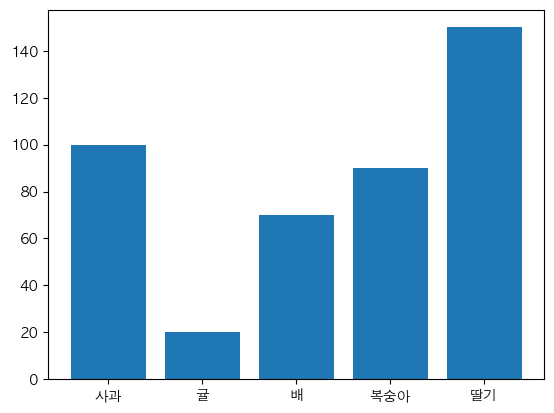

In [4]:
plt.bar(s.index, s)
plt.show()

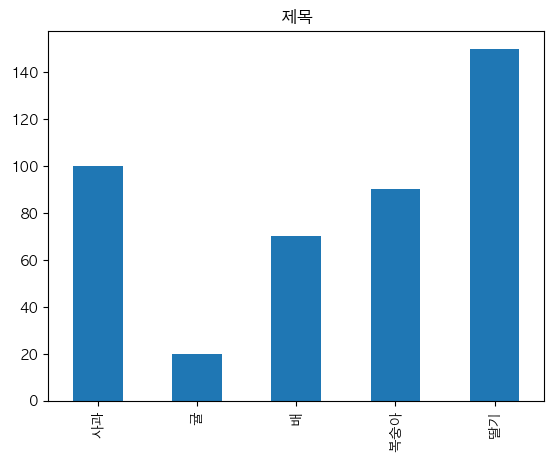

In [7]:
s.plot(kind='bar')  # index이름: label, value: data를 이용해서 그림
plt.title('제목')
plt.show()

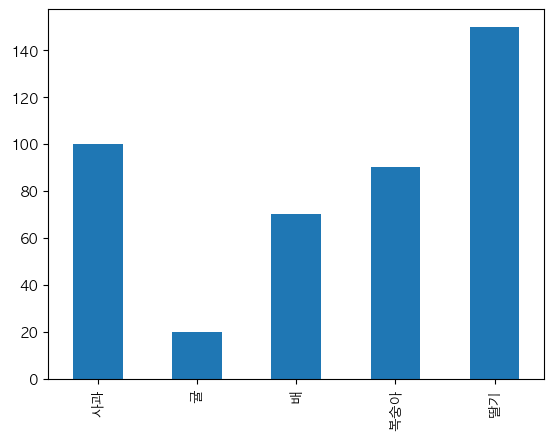

In [9]:
s.plot.bar()  # plot accessor
plt.show()

matplotlib를 이용해 여러 설정들 가능

## 막대 그래프
- index가 무슨 값인지를 가리키는 축으로 사용된다.  ==> 라벨로 사용

In [11]:
tips = pd.read_csv('data/tips.csv')
tips.shape

(244, 7)

In [12]:
tips['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

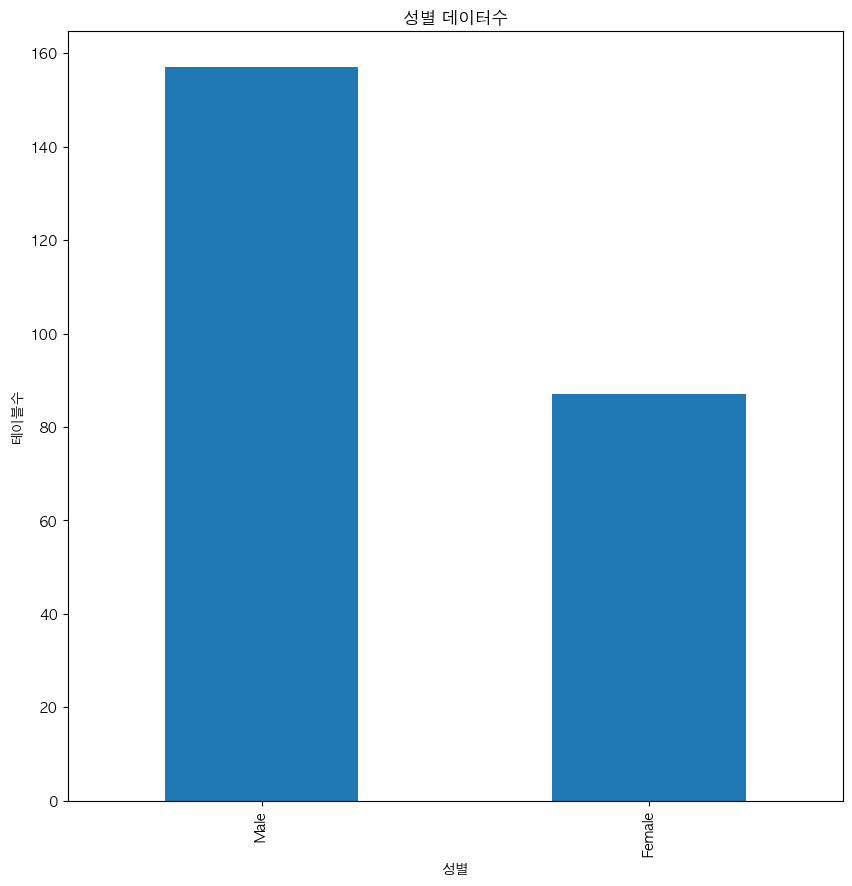

In [18]:
plt.figure(figsize=(10, 10))
tips['sex'].value_counts().plot(kind='bar')

plt.title('성별 데이터수')
plt.xlabel('성별')
plt.ylabel('테이블수')
plt.show()

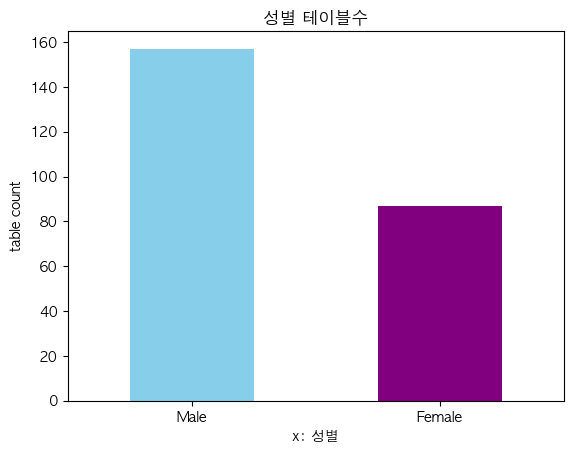

In [31]:
tips['sex'].value_counts().plot(kind='bar',
                                title='성별 테이블수',
                                ylabel='table count',
                                xlabel='x: 성별',
                                rot=0,
                                color=['skyblue', 'purple']
                               )
plt.show()

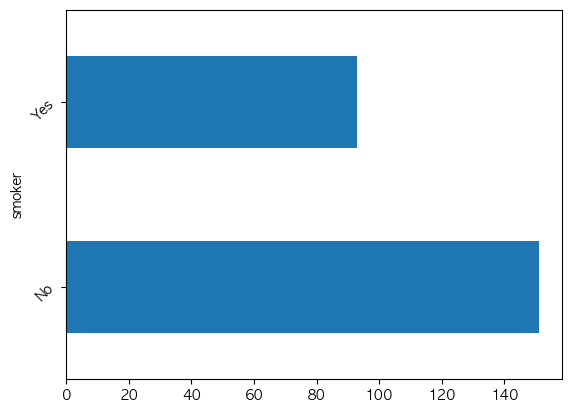

In [28]:
# rot: 라벨의 각도를 돌린다
tips['smoker'].value_counts().plot(kind='barh', rot=45)  # 수평막대그래프
plt.show()

- 두개의 분류 별로 그리기
    - 여러개의 컬럼일 경우 수평 누적 막대그래프를 그린다.


In [35]:
# 흡연부, 성별 테이블수
count_df = tips.pivot_table(index='smoker', columns='sex', values='tip', aggfunc='count')
count_df

sex,Female,Male
smoker,,
No,54,97
Yes,33,60


<Axes: xlabel='smoker'>

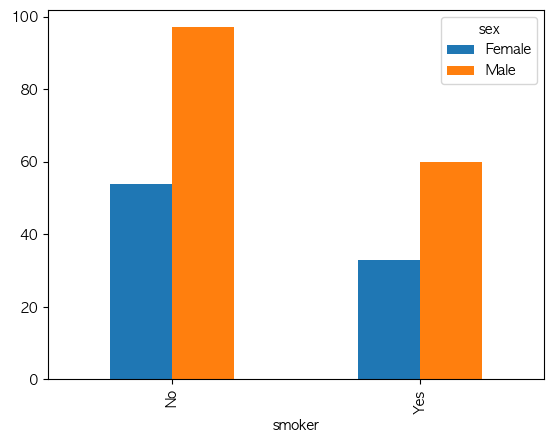

In [37]:
count_df.plot(kind='bar')
# 컬럼이 두 개 이상인 경우 -> 각각 막대그래프를 그린다
# index: 라벨

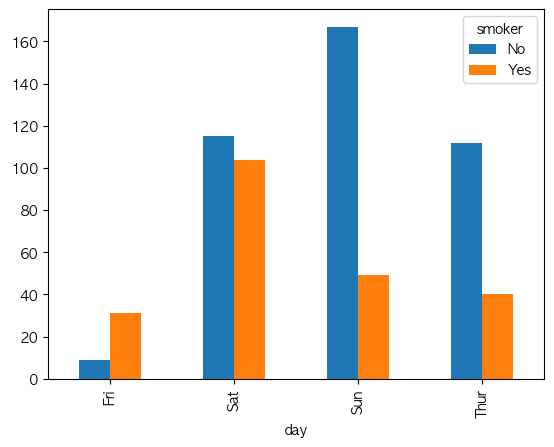

In [46]:
# 요일, 흡연여부별 손님수
tips.pivot_table(index = 'day', columns='smoker', values='size', aggfunc='sum').plot(kind='bar');

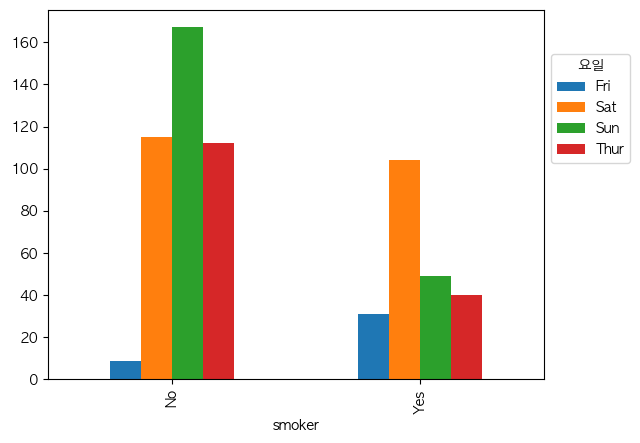

In [47]:
tips.pivot_table(index = 'smoker', columns='day', values='size', aggfunc='sum').plot(kind='bar')
plt.legend(bbox_to_anchor=(1, 0.9), loc='upper left', title='요일')
plt.show()

<Axes: title={'center': '요일별 bill의 평균'}, xlabel='day'>

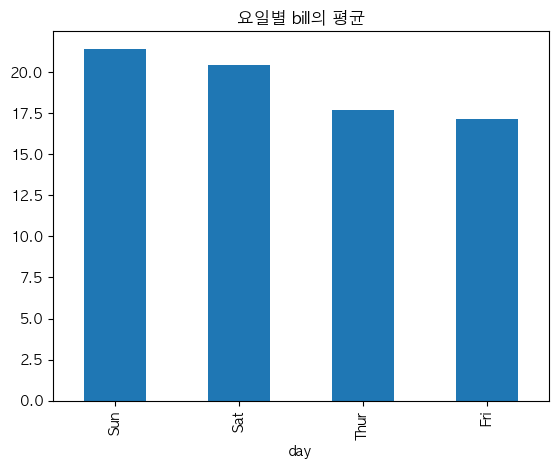

In [52]:
tips.groupby('day')['total_bill'].mean().sort_values(ascending=False).plot(kind='bar', title='요일별 bill의 평균')

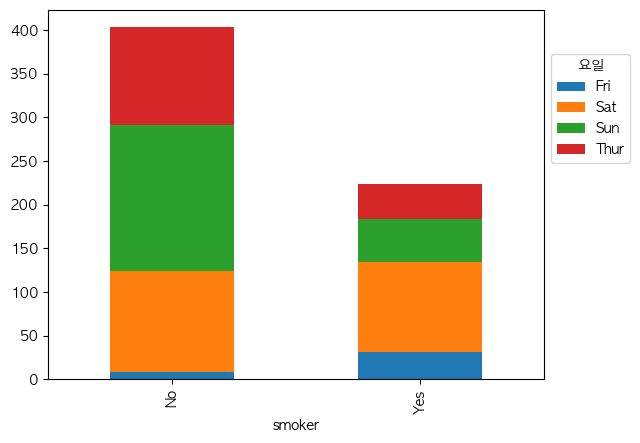

In [53]:
tips.pivot_table(index = 'smoker', columns='day', values='size', aggfunc='sum').plot(kind='bar',
                                                                                     stacked=True)
plt.legend(bbox_to_anchor=(1, 0.9), loc='upper left', title='요일')
plt.show()

## 파이차트

In [57]:
day_cnt = tips['day'].value_counts()
day_cnt

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

<Axes: ylabel='count'>

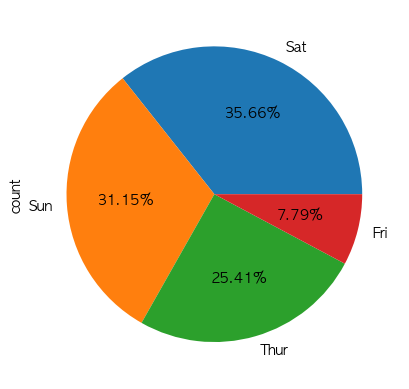

In [73]:
day_cnt.plot(kind='pie',
             autopct='%.2f%%')

<Axes: ylabel='count'>

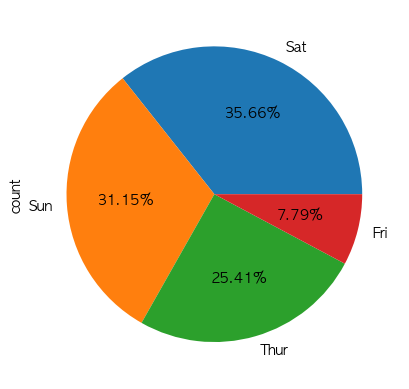

In [74]:
day_cnt.plot.pie(autopct='%.2f%%')

## 히스토그램, KDE(밀도그래프)

<Axes: ylabel='Frequency'>

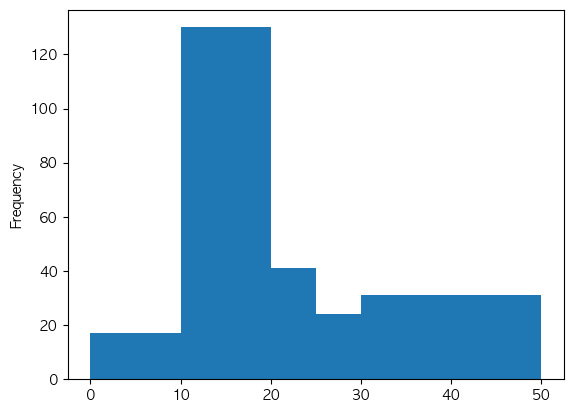

In [72]:
tips['total_bill'].plot(kind='hist',
                        # bins=30,
                        bins=[0, 10, 20, 25, 30, 50]
                       )

<Axes: ylabel='Frequency'>

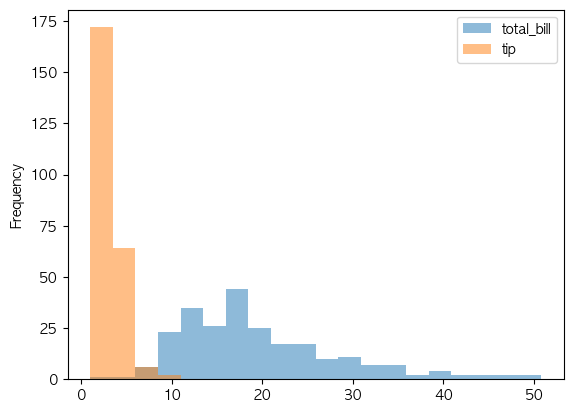

In [76]:
# DataFrame -> 컬럼별
tips[['total_bill', 'tip']].plot.hist(bins=20, alpha=0.5)

In [77]:
!pip install scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/1d/77/5e660d211906becd9f8e13e00d828f5e68b5e66d9b956f4646bb4882c68e/scipy-1.11.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.0/37.0 MB 26.5 MB/s eta 0:00:0000:0100:01


<Axes: ylabel='Density'>

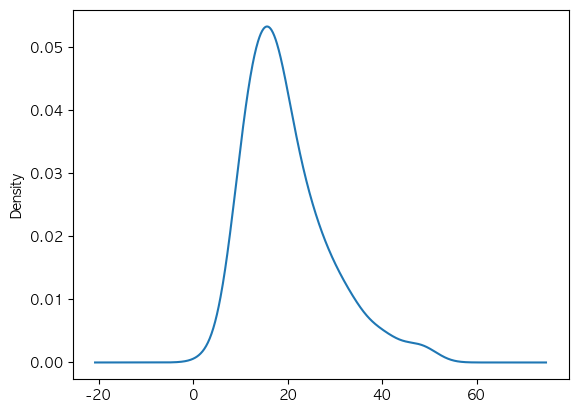

In [78]:
# 커널 밀도 추정 함수
tips['total_bill'].plot(kind='kde')

<Axes: ylabel='Frequency'>

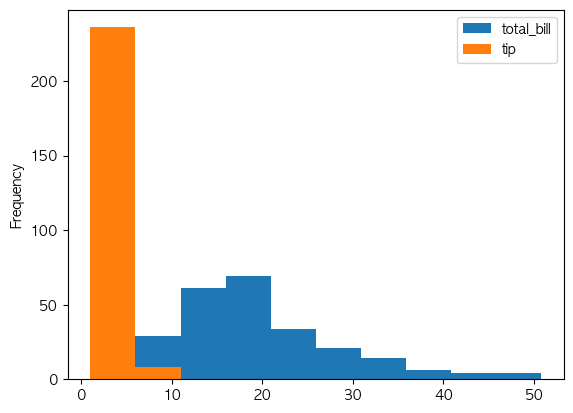

In [79]:
tips[['total_bill', 'tip']].plot.hist()

## Boxplot (상자그래프)

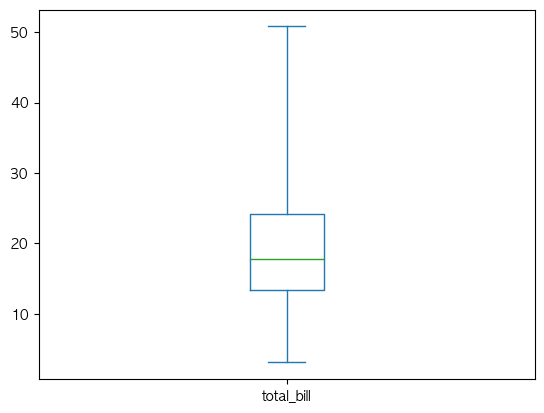

In [80]:
tips['total_bill'].plot(kind='box', whis=3)
plt.show()

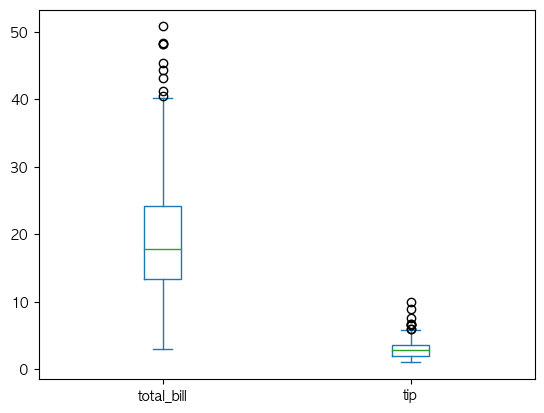

In [83]:
tips[['total_bill', 'tip']].plot.box();

## scatter plot (산점도) 

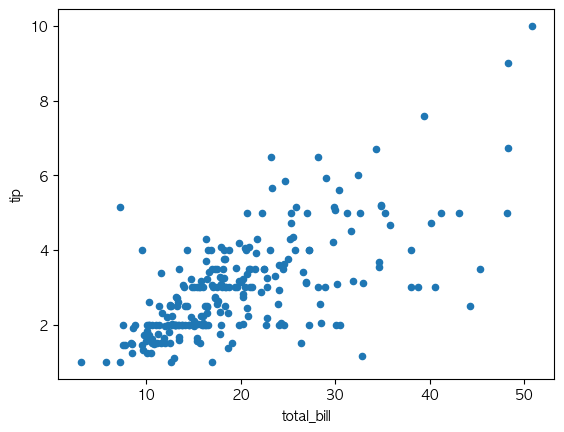

In [85]:
# DataFrame.plot(kind='scatter', x='컬러명', y='컬럼명')
tips.plot(kind='scatter', x='total_bill', y='tip')
plt.show()

In [87]:
tips[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


## 파이썬 날짜/시간 타입 - datetime 모듈

In [88]:
from datetime import datetime # 날짜시간 => 일시 타입
from datetime import date # 날짜
from datetime import time # 시간

In [89]:
# 객체 생성
d = date(year=2023, month=9, day=10)
t = time(hour=21, minute=23, second=20)
dt = datetime(year=2023, month=9, day=10, hour=21, minute=23, second=20)
print(d)
print(t)
print(dt)

2023-09-10
21:23:20
2023-09-10 21:23:20


In [92]:
# 실행시점을 이용해서 생성
today = date.today()
ct = datetime.now()
print(today)
print(ct)

2023-09-22
2023-09-22 15:09:16.524465


In [95]:
today.year, today.month, today.day

(2023, 9, 22)

In [97]:
ct.year, ct.month, ct.day, ct.hour, ct.minute, ct.second

(2023, 9, 22, 15, 9, 16)

In [100]:
#### 날짜, 시간, 일시 => 원하는 형식의 문자열 변환
## strftime() 메소드 
s = ct.strftime('%Y년 %m월 %d일 %H시 %M분 %S초')
print(type(s))
s

<class 'str'>


'2023년 09월 22일 15시 09분 16초'

In [101]:
# 일시형식의 문자열을 datetime으로 변환
## strptime()
d = datetime.strptime('2023년 09월 22일 15시 09분 16초', '%Y년 %m월 %d일 %H시 %M분 %S초')
print(type(d))
d

<class 'datetime.datetime'>


datetime.datetime(2023, 9, 22, 15, 9, 16)

In [102]:
### 일/시에서 특정 일시를 빼거나 더한 날짜를 계산
#### datetime.timedelta: 계산하려는 일시
from datetime import timedelta

In [106]:
now = datetime.now()
# 3일(timedelta) 후 (+)
print(now + timedelta(days=3))
# 3일(timedelta) 전 (-)
print(now - timedelta(days=3))

2023-09-25 15:24:21.696926
2023-09-19 15:24:21.696926


In [108]:
# weeks, days, hours, minutes, seconds, microseconds(1/100만 초)
# 3주 후의 날짜
print(now + timedelta(weeks=3))
print(now + timedelta(days=3, hours=10))

2023-10-13 15:24:21.696926
2023-09-26 01:24:21.696926


## Pandas - Timestamp
- 일시 타입.(날짜와 시간을 나노초(1/10억 초) 단위로 관리)

In [111]:
import pandas as pd

pd.Timestamp(year=2010, month=12, day=21)
pd.Timestamp(year=2010, month=12, day=21, hour=11, minute=30)
pd.Timestamp(year=2010, month=12, day=21, hour=11, minute=30, second=22)

Timestamp('2010-12-21 11:30:22')

In [112]:
# 날짜는 - 구분, 시간은 : 구분
pd.Timestamp("2000-10-22")
pd.Timestamp('2000-10-22 10:22:33')

Timestamp('2000-10-22 10:22:33')

In [115]:
s = pd.Series(['2000-10-10','2000-10-11','2000-12-10','2000-10-12','2004-11-5'])
print(s.dtype)
# 날짜 형식의 문자열들의 Series -> type: Timestamp
s2 = pd.to_datetime(s)
s2

object


0   2000-10-10
1   2000-10-11
2   2000-12-10
3   2000-10-12
4   2004-11-05
dtype: datetime64[ns]

In [ ]:
# accessor: dy => Series가 timestamp일 때 사용할 수 있는 속성/메소드를 제공


In [117]:
s2.dt.year

0    2000
1    2000
2    2000
3    2000
4    2004
dtype: int32

In [118]:
s2.dt.year

0    2000
1    2000
2    2000
3    2000
4    2004
dtype: int32

In [119]:
s2.dt.day

0    10
1    11
2    10
3    12
4     5
dtype: int32

In [ ]:
# 특정 기간만큼 지나거나 전의 날짜를 계산

In [125]:
s2 + pd.Timedelta(days=20)

0   2000-10-30
1   2000-10-31
2   2000-12-30
3   2000-11-01
4   2004-11-25
dtype: datetime64[ns]

In [127]:
s2 - pd.Timedelta(weeks=5, days=10, hours=10)

0   2000-08-25 14:00:00
1   2000-08-26 14:00:00
2   2000-10-25 14:00:00
3   2000-08-27 14:00:00
4   2004-09-20 14:00:00
dtype: datetime64[ns]

In [128]:
pd.date_range('2023-1-1', freq='M', periods=5)

# freq: 간격기간 (정수+기간표시문자) 5M: 5개월, -4Y: 4년씩 뒤로
# 기간표시문자: Y, M, D, H, T(분), S
#       기간표시문자 뒤에 S를 붙이는 경우 (YS, MS) - 시작 일시. S가 없으면 마지막 일시

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31'],
              dtype='datetime64[ns]', freq='M')

In [129]:
pd.date_range('2023-1-1', freq='MS', periods=5)

DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01'],
              dtype='datetime64[ns]', freq='MS')

In [130]:
pd.date_range('2023-1-1', freq='Y', periods=5)

DatetimeIndex(['2023-12-31', '2024-12-31', '2025-12-31', '2026-12-31',
               '2027-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [133]:
pd.date_range('2023-1-1', freq='-5YS', periods=5)

DatetimeIndex(['2023-01-01', '2018-01-01', '2013-01-01', '2008-01-01',
               '2003-01-01'],
              dtype='datetime64[ns]', freq='-5AS-JAN')

In [137]:
index = pd.date_range('2023-1-1', freq='D', periods=10)
value = np.random.randint(1, 100, size=(10, 3))
df = pd.DataFrame(value, columns=['NO1', 'NO2', 'NO3'], index=index)
df

,NO1,NO2,NO3
2023-01-01,48,41,5
2023-01-02,70,26,12
2023-01-03,80,56,40
2023-01-04,20,26,77
2023-01-05,73,94,38
2023-01-06,15,83,47
2023-01-07,99,55,72
2023-01-08,33,24,72
2023-01-09,19,91,57
2023-01-10,27,1,79


In [142]:
df = pd.read_excel('data/강수량.xlsx')
df = df.set_index('계절').T
df.rename_axis('년도', axis=0, inplace=True)

In [143]:
df

계절,봄,여름,가을,겨울
년도,,,,
2009,231.3,752.0,143.1,142.3
2010,302.9,692.6,307.6,98.7
2011,256.9,1053.6,225.5,45.6
2012,256.5,770.6,363.5,139.3
2013,264.3,567.5,231.2,59.9
2014,215.9,599.8,293.1,76.9
2015,223.2,387.1,247.7,109.1
2016,312.8,446.2,381.6,108.1
2017,118.6,609.7,172.5,75.6


In [146]:
df.index = pd.to_datetime(df.index, format='%Y')

In [147]:
df

계절,봄,여름,가을,겨울
년도,,,,
2009-01-01,231.3,752.0,143.1,142.3
2010-01-01,302.9,692.6,307.6,98.7
2011-01-01,256.9,1053.6,225.5,45.6
2012-01-01,256.5,770.6,363.5,139.3
2013-01-01,264.3,567.5,231.2,59.9
2014-01-01,215.9,599.8,293.1,76.9
2015-01-01,223.2,387.1,247.7,109.1
2016-01-01,312.8,446.2,381.6,108.1
2017-01-01,118.6,609.7,172.5,75.6


<Axes: xlabel='계절'>

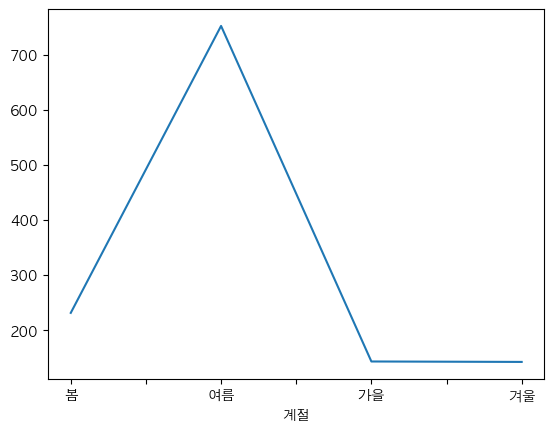

In [148]:
# lineplot으로 변화흐름 확인 
# kind default값이 line이라 생략해도 됨
df.loc['2009-01-01'].plot()  #kind='line')

<Axes: xlabel='년도'>

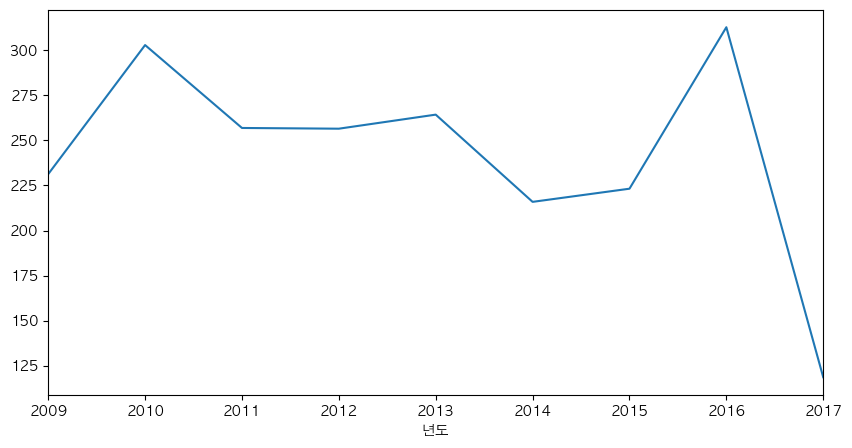

In [150]:
df['봄'].plot(figsize=(10, 5))

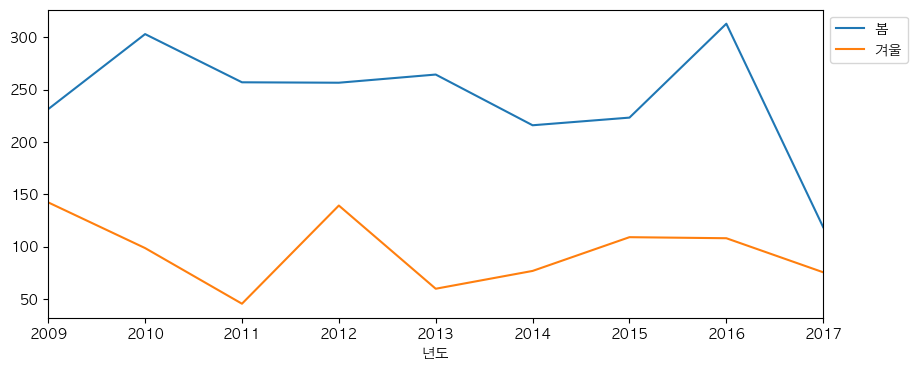

In [158]:
df[['봄', '겨울']].plot(figsize=(10, 4))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

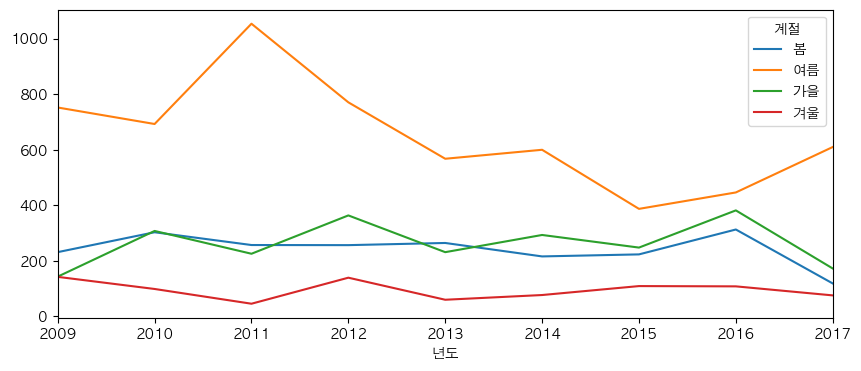

In [159]:
df.plot(figsize=(10, 4));